In [1]:
%reload_ext autoreload
%autoreload 2
%run startup.py
from tqdm.auto import tqdm


def grouper(n, iterable):
    it = iter(iterable)
    while True:
        chunk = tuple(islice(it, n))
        if not chunk:
            return
        yield chunk

In [2]:
# Check differences between two was of calculating values. 
from trajectory.gsolver import accel_acd, accel_xt

rows = []
for v_0, v_c, v_1 in tqdm(list(product(velocities,velocities, velocities))):
    x_ad, t_ad = accel_acd(v_0, v_c, v_1, a_max)
    
    x_a, t_a = accel_xt(v_0, v_c, a_max)
    x_d, t_d = accel_xt(v_c, v_1, a_max)
    
    rows.append( dict(x = x_ad - (x_a+x_d), t = t_ad -(t_a+t_d) ))
    
df = pd.DataFrame(rows)
                
df.describe()
    

  0%|          | 0/13824 [00:00<?, ?it/s]

,x,t
count,1.382400e+04,1.382400e+04
mean,-4.584248e-16,-5.398423e-19
std,1.117347e-14,6.388327e-18
min,-5.684342e-14,-2.775558e-17
25%,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00
75%,0.000000e+00,0.000000e+00
max,1.136868e-13,2.775558e-17


In [3]:
# Test that values get passed through the Block sontructors. 
from trajectory.planner import  Joint

j = Joint(5_000, 50_000)
self = j.new_block(100,123,456)

assert self.x == 100, self.x
assert self.v_0 == 123
assert self.joint.v_max == 5_000

self = j.new_block(100,123,456)

assert self.x == 100
assert self.v_0 == 123
assert self.joint.v_max == 5_000


In [4]:
%reload_ext autoreload
%autoreload 2
%run startup.py

from trajectory.planner import Joint, SegmentList

# Basic init and plan testing
#  - Initial planning
#  - Multiple updates to new time. 

j = Joint(5_000, 50_000)

n = 0
errors = []
rows = []
for i, (x, v_0, v_1) in tqdm(limits()): #choices(limits(),k=2_000):

    for _ in range(10):
        tf = random()*3+1.01 # Time factor, multiply with block time
        try:
            b = j.new_block(x, v_0, v_1).init()
            assert abs(b.area-b.x) < 1, (b, i)
            t = b.t*tf
            b.plan(t)
            assert abs(b.area - b.x)<3, (b.area, b, i, b.flag)
            if b.t != t:
                ot = b.t
                b.plan(ot)
                #assert round(self.t, 6) == round(ot, 6), (self.t, t)
                
            a = b.area
        except:
            errors.append( (i, tf, b))
            raise
        d = dict(i=i, x=x, t=self.t, v_0=b.v_0, v_1=b.v_1, v_c=b.v_c, a=a)
        rows.append(d)
        
df = pd.DataFrame(rows)  
print('# rows =', len(df))

  0%|          | 0/11520 [00:00<?, ?it/s]

# rows = 115200


In [5]:
%reload_ext autoreload
%autoreload 2
%run startup.py

from trajectory.planner import Joint, SegmentList


# Basic init and plan testing
#  - Initial planning
#  - Multiple updates to new time. 

j = Joint(5_000, 50_000)

n = 0
errors = []
rows = []
for i in tqdm(list(range(2_000))):

  
    x =   int(random() < .90)*randint(-10000,10000)
    v_0 = int(random() < .90)*randint(0, j.v_max)
    v_1 = int(random() < .90)*randint(0,j.v_max)
                
    for _ in range(10):
        tf = random()*3+1.01 # Time factor, multiply with block time
        a = x_e = None
        try:
            b = j.new_block(x, v_0, v_1).init()
            assert abs(b.area-b.x) < 1, (b, i)
            t = b.t*tf
            b.plan(t)
            assert abs(b.area - b.x)<3, (b.area, self, i)
            if b.t != t:
                ot = b.t
                b.plan(ot)
               
            a = b.area
        except:
            errors.append( (i, x, v_0, v_1, tf))
            raise
        
        d = dict(i=i, x=x, t=self.t, v_0=b.v_0, v_1=b.v_1)
        rows.append(d)
        
df = pd.DataFrame(rows)  
print('# rows =', len(df), "# errors = ", len(errors) )
#df.qc.value_counts(normalize=True)

  0%|          | 0/2000 [00:00<?, ?it/s]

# rows = 20000 # errors =  0


In [6]:
if errors:
    (i, x, v_0, v_1, tf)  = errors[0]
    print(i, x, v_0, v_1)
    self = j.new_block(x, v_0, v_1).init()
    t = self.t*tf
    try:
        self.plan(t)
    except:
        print(t, self.x, self.t, self.v_0, self.v_1, tf)

In [7]:
if errors:
    (i,  (x, v_0, v_1), tf) = errors[0]
    print(x, v_0, v_1, tf)
    
    #(x, v_0, v_1, tf) =  10,250,750,1.231111111111111


    self = j.new_block(x, v_0, v_1).init()
    t = self.t

    self.plan(t * tf)
    self.plan_ramp(t*tf)
    
           
    self.plan(t * tf)
    self.plan_ramp(t*tf)
    
    print(self)

In [33]:
%%time 
%reload_ext autoreload
%autoreload 2
%run startup.py

from trajectory.planner import Joint, SegmentList
from trajectory.plot import *
from random import random, randint
from tqdm.auto import tqdm

j = Joint(20_000, 500_000)
n = 6
joints = [j]*n
signs = [1]*n

sl = SegmentList(joints)   


def rand_move(axis):

    z = int(random() < .9) # Make 10% of the moves zero    
    signs[axis] = -signs[axis] if random() < .1 else signs[axis] # change direction 10% of the time

    return z * signs[axis] * randint(0,1000)
 
move_sets = [ [ rand_move(axis) for axis in range(len(joints))] for _ in range(1000) ]

for move_n, moves in tqdm(list(enumerate(move_sets))):
    try:
        sl.move(moves)
    except:
        print("Move=", move_n, move_sets[move_n])
        raise

def report_dis():
    ds = list(sl.discontinuities())
    if len(ds):
        print(f"Got {len(ds)} discontinuities") 
        for a, b in sl.discontinuities():
            be = sl.boundary_error(a.segment, b.segment)
            print(a.id, 'diff=',abs(a.v_1-b.v_0), a.v_1,'!=',b.v_0, "be=", be )

report_dis()
            
#df = sl.dataframe
#df = df[df.axis==0]
#sl.plot()
from collections import Counter

Counter(sl.replans).most_common(20)

  0%|          | 0/1000 [00:00<?, ?it/s]

CPU times: user 6.17 s, sys: 101 ms, total: 6.27 s
Wall time: 6.24 s


[(4, 864),
 (2, 348),
 (0, 279),
 (6, 168),
 (5, 127),
 (3, 61),
 (7, 51),
 (1, 32),
 (8, 29),
 (9, 15),
 (10, 12),
 (11, 8),
 (14, 2),
 (13, 2)]

In [35]:

def f():
    for s in sl:
        x = [b.x for b in s]
        mi = np.argmax(x)
        for i,b in enumerate(s.blocks):
            if i != mi:
                yield b.t
    
t = pd.DataFrame(f())
t.describe()


,0
count,5000.000000
mean,0.033033
std,0.005939
min,0.011581
25%,0.029311
50%,0.033191
75%,0.037217
max,0.045158


In [10]:
a=list('ABCD')
i = len(a)-1
a[i]

'D'

  0%|          | 0/100 [00:00<?, ?it/s]

1 [[-97, 233, 212, -119], [-24, 0, 36, -39], [-28, 123, 24, -26], [-164, 20, 0, -149], [-64, 135, 154, -188]]
[[-97, 233, 212, -119], [-24, 0, 36, -39], [-28, 123, 24, -26], [-164, 20, 0, -149], [-64, 135, 154, -188]]


/Users/eric/Documents/proj/trajectory/trajectory/plot.py:56: UserWarning: Found 1 discontinuities in axis 3
  warn(f"Found {discontinuities[0]} discontinuities in axis {axis}")


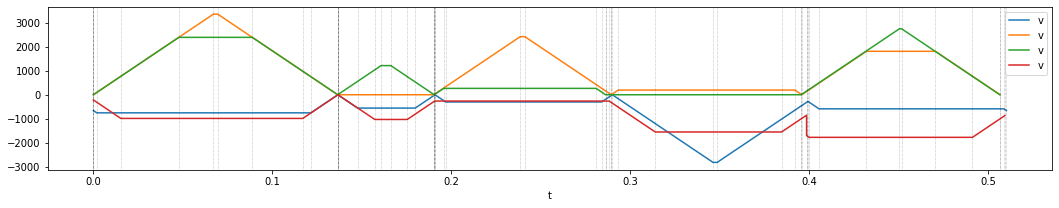

In [36]:
# Search for discontinuities
from trajectory.planner import Joint, SegmentList
from trajectory.plot import *
from random import random, randint
from tqdm.auto import tqdm

j = Joint(5_000, 50_000)
n = 4
joints = [j]*n
signs = [1]*n

def f():
    for i in tqdm(list(range(100))):
        sl = SegmentList(joints)  
        move_sets = [ [ rand_move(axis) for axis in range(len(joints))] for _ in range(5) ]


        for move_n, moves in enumerate(move_sets):
            try:
                sl.move(moves)
            except:
                print("Move=", move_n, move_sets[move_n])
                return move_sets

        if i > 5 and len(list(sl.discontinuities())):
            ds = list(sl.discontinuities())
            print(len(ds), move_sets)   
            sl.plot()
            return move_sets
    else:
        print("Got Nothing")

move_sets = f()
print(move_sets)